# USE CASE : CREDIT SCORING
Credit Scoring is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual. <br>
In this case, the data contains information related to credit card customers in a country on January-March 2015 period. The information includes the customer's background, the number of bills, the amount of payment, the length of payment due and the status of the following month's payment (April 2015). <br>
In this modeling, the purpose is to predict whether a customer is at risk of being late paying on February-April and the model might be useful is the 'Classification' Machine Learning model.

## 1. LOAD DATA TRAINING
Read data to perform Modelling Machine Learning 'Classification' by input as 'df' variable

In [291]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier

In [141]:
df=pd.read_csv('training.csv')
df.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


## 2. DATA UNDERSTANDIING
Do some quick-look about data we're about to explore by run the dimension, data type, head/tail, summary statistics, etc 
to understand the data itself. <br>
**ID = Nomor Urut** <br>
**AGE = Umur** <br>
**LIMIT_BAL = Batas maksimal kredit** <br>
**EDUCATION = Tingkat pendidikan** <br>
1: S2/S3 <br>
2: Dipl/S1 <br>
3: SMA <br>
4: Lainnya <br>
**MARRIAGE = Status Pernikahan** <br>
1: Belum Menikah <br>
2: Menikah <br>
3: Lainnya <br>
**SEX** <br>
1: Pria <br>
2: Wanita <br>
**PAY_1 … 3	= Keterlambatan Bayar** <br>
0: Tepat waktu <br>
1: Terlambat 1 bulan, dst <br>
**BILL_AMT1 … 3 = Jumlah Tagihan** <br>
**PAY_AMT1 …3 = Jumlah yang Harus Dibayarkan** <br>
**TARGET** <br>
1: Terlambat <br>
0: Tidak terlambat

In [142]:
df.shape

(16625, 16)

In [143]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [144]:
df.tail()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
16620,16621,350000.0,1,2,1,56,3,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,16622,380000.0,2,2,1,60,2,2,2,72557.0,77708.0,79384.0,7000.0,3500.0,0.0,1
16622,16623,340000.0,2,2,1,56,4,3,2,3565.0,3356.0,2758.0,0.0,0.0,22000.0,1
16623,16624,430000.0,1,1,1,61,1,0,0,-1645.0,78379.0,76304.0,85900.0,3409.0,1178.0,1
16624,16625,410000.0,1,2,1,61,0,0,0,47929.0,48905.0,49764.0,2078.0,1800.0,1430.0,1


In [145]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'EDUCATION', 'SEX', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'TARGET'],
      dtype='object')


In [146]:
df.dtypes

ID             int64
LIMIT_BAL    float64
MARRIAGE       int64
EDUCATION      int64
SEX            int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
TARGET         int64
dtype: object

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [148]:
df.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.482226,0.430256,0.397293,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.835516,0.881835,0.853110,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,1.000000,0.000000,0.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,1.000000


### Missing Value Detection
Identifying any missing values in the data before perform any analysis. It's actually depend on the purpose of the performance, but if there is any missing values, we can cleanse and prepare it by either remove it from dataframe or doing imputation.

In [149]:
df.isnull().sum().sort_values(ascending=False)

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
AGE          0
SEX          0
EDUCATION    0
MARRIAGE     0
LIMIT_BAL    0
ID           0
dtype: int64

### Outlier Detection
Outlier detection can be seen by visualize with boxplot. At first, we need to split the data 'df' into categorical data and numerical data.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [267]:
#drop the unused variable from dataset
df2 = df.drop('ID', axis = 1)
df2.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [152]:
#define numerical variables
numerical= ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'AGE']
numerical = df[numerical]
numerical.head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,AGE
0,30000.0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,40
1,20000.0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,41
2,20000.0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,36
3,20000.0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,35
4,170000.0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,38


In [153]:
#make categorical variable from dataset by dropping numerical variable from dataset
categorical = df2.drop(numerical, axis = 1)
categorical.head()

,MARRIAGE,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,TARGET
0,1,1,2,0,0,0,0
1,1,1,2,1,2,0,0
2,1,1,2,0,0,0,0
3,1,1,2,0,0,0,0
4,1,1,2,0,0,0,0


In [154]:
numerical.describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,AGE
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,43.373955
std,124931.062684,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,8.777974
min,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,20.000000
25%,50000.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,37.000000
50%,120000.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,42.000000
75%,230000.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,49.000000
max,800000.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,72.000000


In [155]:
categorical.describe()

,MARRIAGE,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,1.476932,2.117534,1.588752,0.482226,0.430256,0.397293,0.399158
std,0.523590,0.791191,0.492075,0.835516,0.881835,0.853110,0.489740
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,4.000000,2.000000,4.000000,4.000000,4.000000,1.000000


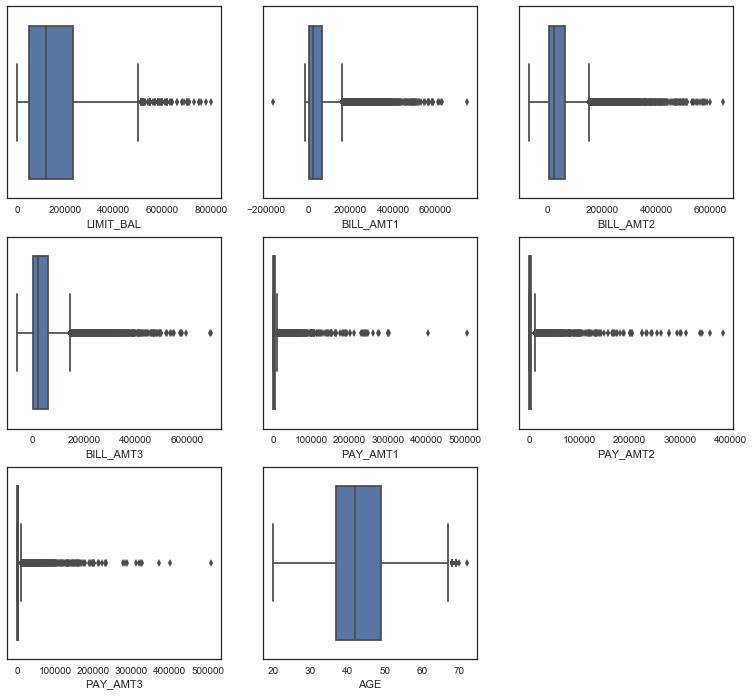

In [156]:
#define the distributin plot of each of numerical variables to see outlier
#determine the size of the figure plot
fig=plt.figure(figsize=(13,12))
axes=330
#using boxplot to visualize each numerical variables in one single loop 
for num in numerical:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=numerical, x=num)

plt.show()

From the result above it can be seen that there are pretty large outlier in numerical data except for Age.<br>
For Age, the outliers lie not far from maximum point, so it will not be a problem. Except for Age, they have positive skew of normal curve with distribution of the data tends to go right. For some purposes, a different approach to outliers could be to try creating a transformation of the data, either transform the value or transform the variable, such as creating a percentile version of the original field, transform the variable to create normal distribution, discreatizing, etc. But, in this case, we will not make any transformation to data outlier.

### Target Distribution
Target distribution can be seen by visualize with barplot.

In [157]:
target=df['TARGET'].value_counts()
target

0    9989
1    6636
Name: TARGET, dtype: int64

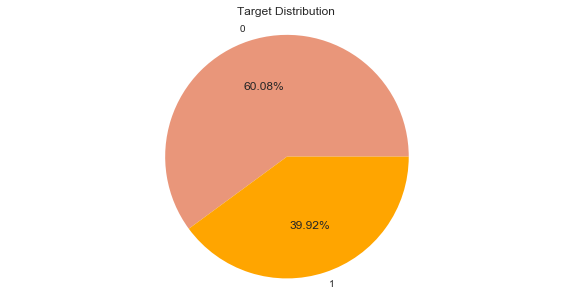

In [158]:
#define color, and label of the chart
plt.figure(figsize=(10,5))
colors = ['darksalmon', 'orange']
labels=['0', '1']
#build the pie chart
plt.title('Target Distribution')
plt.pie(target,labels=labels,
        colors=colors,
        autopct='%1.2f%%')

plt.axis('equal')

plt.show()

We can see that the target distribution between "1=Terlambat , 0=Tidak Terlambat" is relatively the same and balance so we can use this target distribution column.

## 3. DATA EXPLORATION
We can get Insight for Businesses by visualizing the data by plot. From the visualization we can determine the possible fitted model.

### Correlation
Correlation can be seen by visualize with heatmap.

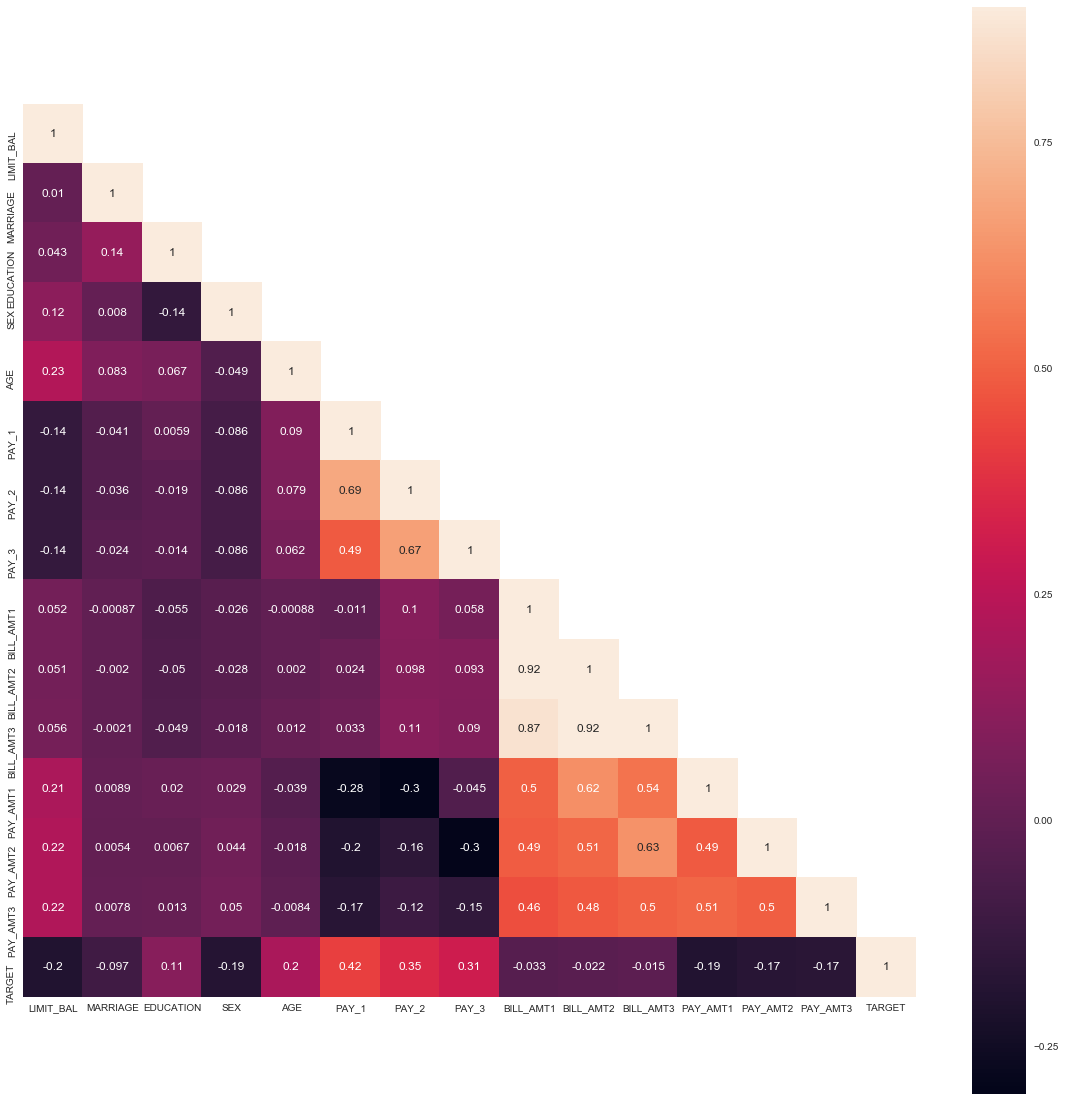

In [159]:
#We want to know the correlation between target variable and all other variables by using spearman (categoric and numerical)
#create correlation with heatmap
corr = df2.corr(method = 'spearman')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (25,25))
fig.set_size_inches(20,20)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

From the result above, it can be seen that correlation between target variable and other variables is small.<br>
But, between variables, there are some correlation in late payment, amount bill, and amount paid. This month late payment has correlation with previous month late payment, this month amount bill has correlation with previous month amount bill, and this month amount paid has correlation with previous month amount paid. Also, there are some correlation between amount bill and amount paid.<br> 
Importantly, We can see that the Target variable has highest correlation with late payment and the followed by Age and Education, meanwhile the correlation is negative with another variables.

### Categorical Graphs
Categorical graphs by countplot

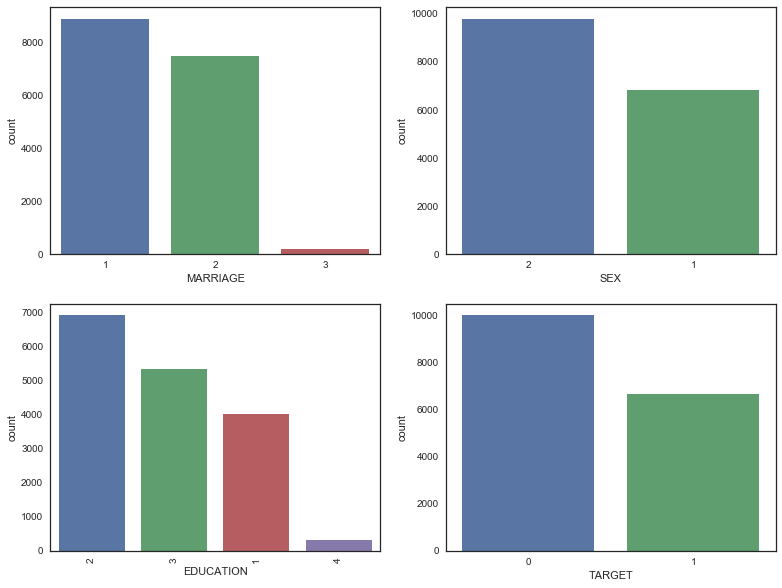

In [160]:
#Descriptive visualization from the categorical data
f=plt.figure(figsize=(13,10))
f.add_subplot(2,2,1)
sns.countplot(categorical['MARRIAGE'], order=categorical['MARRIAGE'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(categorical['SEX'],order=categorical['SEX'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(categorical['EDUCATION'],order=categorical['EDUCATION'].value_counts().index)
plt.xticks(rotation=90)
f.add_subplot(2,2,4)
sns.countplot(categorical['TARGET'], order=categorical['TARGET'].value_counts().index)

We can see that mostly marital status of customer is "Belum Menikah" while the least is 'Lainnya'. <br>
We can see that mostly gender of customer is "Perempuan". <br>
We can see that mostly education level of customer is "D3/S1" while the least is 'Lainnya'.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

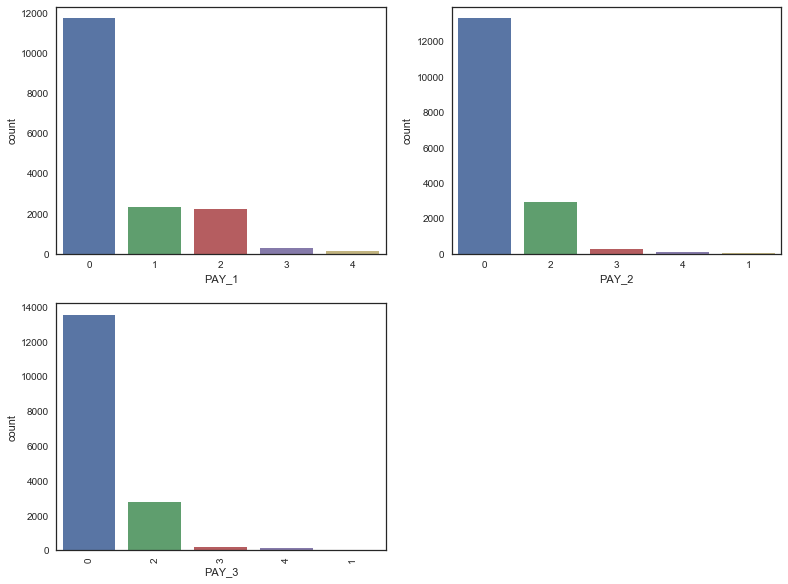

In [161]:
#Descriptive visualization from the categorical data
f=plt.figure(figsize=(13,10))
f.add_subplot(2,2,1)
sns.countplot(categorical['PAY_1'], order=categorical['PAY_1'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(categorical['PAY_2'],order=categorical['PAY_2'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(categorical['PAY_3'],order=categorical['PAY_3'].value_counts().index)
plt.xticks(rotation=90)

We can see that in the first, second, and third month, most of customer pay on time. <br>
But then followed by a late payment of 1 month in the second and third month and a late payment of 4 months in the first month.

### Numerical Graphs
Numerical graphs by countplot and distplot

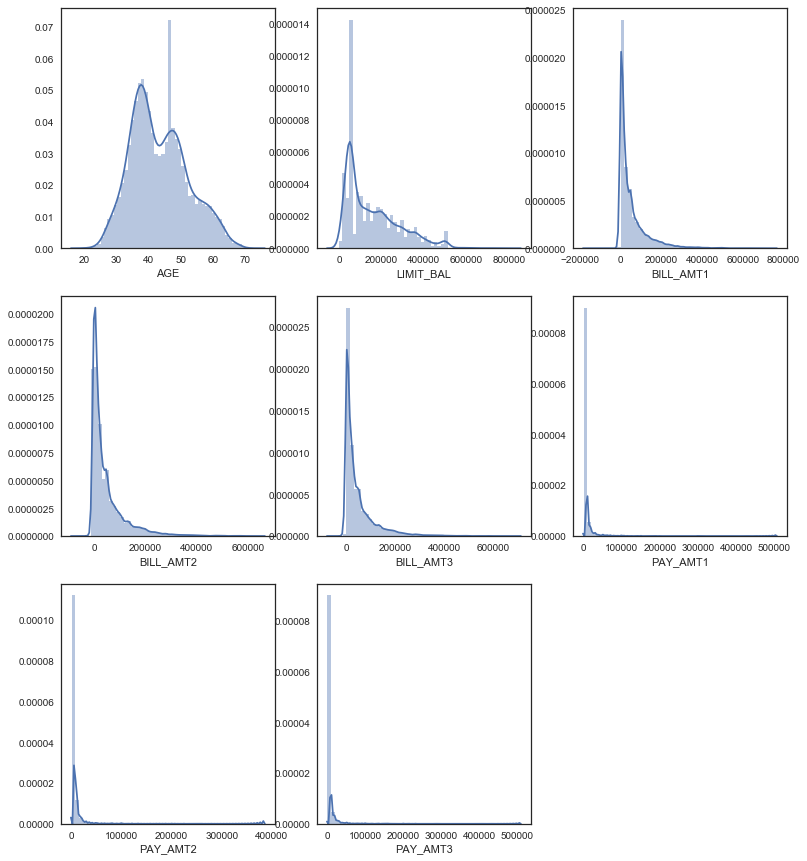

In [162]:
f=plt.figure(figsize=(13,15))
f.add_subplot(3,3,1)
sns.distplot(numerical['AGE'])
f.add_subplot(3,3,2)
sns.distplot(numerical['LIMIT_BAL'])
f.add_subplot(3,3,3)
sns.distplot(numerical['BILL_AMT1'])
f.add_subplot(3,3,4)
sns.distplot(numerical['BILL_AMT2'])
f.add_subplot(3,3,5)
sns.distplot(numerical['BILL_AMT3'])
f.add_subplot(3,3,6)
sns.distplot(numerical['PAY_AMT1'])
f.add_subplot(3,3,7)
sns.distplot(numerical['PAY_AMT2'])
f.add_subplot(3,3,8)
sns.distplot(numerical['PAY_AMT3'])

Same with the insight we can get from 'Outlier Detection' above, we can see that all the distplot of numerical variables have positive skew of normal curve with distribution of the data tends to go right, except for Age which is more intending to form normal distribution.

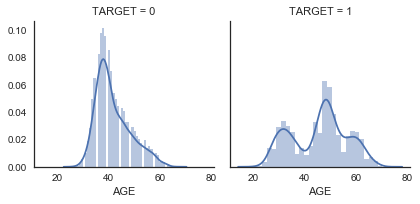

In [163]:
# Explore Target vs Age
g = sns.FacetGrid(df2, col='TARGET')
g = g.map(sns.distplot, "AGE")

If we look inside the exploration based on age, we can find that the distribution of age for Target=0 'Tidak Terlambat' is between 25 to 72 with the most age is around 38. <br>
While, the distribution of age for Target=1 'Terlambat' is between 20 to 72 with the most age is around 50.

To see the detailed of Target Probability in 'Age', we can use 'pd.qcut' function that discretize variable into equal-sized buckets based on rank or based on sample quantiles into 5 quantiles.

In [164]:
df2.AGE = pd.qcut(df2.AGE.values, 5).codes

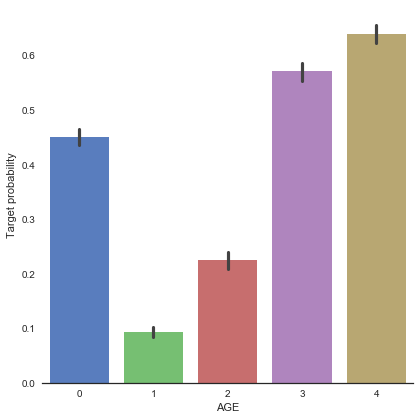

In [165]:
# Explore Target vs Age
g  = sns.factorplot(x="AGE",y="TARGET",data=df2,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

We can see that each age quantile has an uneven relationship on the possibility of late payment. The highest probability of relationship is on 5th quantile and the lowest probability is in the 2nd quantile.

## 4. MACHINE LEARNING MODEL
### The 'Classification' model using 'Decision Tree Classification'. <br>
Decision Tree algorithm is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.<br>
Each internal node represents a “test” on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules. <br>
Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or regression). Decision Tree algorithms are referred to as CART (Classification and Regression Trees).

In [268]:
df2.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### Load Data Testing

In [322]:
test=pd.read_csv('testing.csv',sep=';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [323]:
#drop the unused variable from dataset
test2=test.drop('ID',axis=1)
test2.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [271]:
test2.shape

(16625, 14)

### Preprocessing Data for Modeling

In [272]:
#Define x and y variable for modeling
df3=df2.drop(columns=['TARGET'])

In [273]:
y = df2["TARGET"]
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Split Training and Testing Data in Modeling
Using train_test_split will return 4 different parameters, namely x_trainset, x_testset, y_trainset, y_testset <br>
The train_test_split will need the parameters: x, y, test_size=0.3, and random_state=3. <br>
**x** and **y** are the arrays required before the split, test_size represents the ratio of testing dataset, and random_state ensures that we obtain the same splits.

In [274]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

### Modeling
Define model variable 'Tree' for an instance of the 'Decision Tree Classifier'<br>
Inside classifier, specify criterion="entropy" so information gain of each node is visible.

In [275]:
Tree = DecisionTreeClassifier(criterion="gini", max_depth = 10) #it shows the default parameters
Tree 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Data Fitting
Fitting data with training feature matrix x_trainset and training  response vector y_trainset

In [276]:
Tree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Model Prediction
Prediting model with variable defined is 'predTree'

In [277]:
predTree = Tree.predict(x_testset)

### The Accuracy of Model
Checking model accuracy using  'metrics.accuracy'

In [336]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision Tree's Accuracy:  0.8482357658380112


This model lead to an accuracy rate of 0.8482357658380112 on Training Model.<br>
I deem this accuracy rate to be acceptable given that we used a relatively simple quantile based approach and in light of the fact that no parameter optimization was undertaken.

## 5. PREDICT TESTING DATA USING DECISION TREE
So, The model can be used to predict whether a customer is at risk of being late paying on February-April. <br>
Variable defined to predict 'testing' data is 'predTree_test'

In [279]:
predTree_test = Tree.predict(test2)

### The Result of Testing Data Prediction

In [310]:
test2['TARGET']=predTree_test
test2.tail()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
16620,350000.0,1,2,1,56,2,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,380000.0,2,2,1,60,2,2,2,77708.0,79384.0,77519.0,3500.0,0.0,7000.0,1
16622,340000.0,2,2,1,56,3,2,0,3356.0,2758.0,20878.0,0.0,22000.0,4200.0,1
16623,430000.0,1,1,1,61,0,0,0,78379.0,76304.0,52774.0,3409.0,1178.0,1926.0,1
16624,410000.0,1,2,1,61,0,0,0,48905.0,49764.0,36535.0,1800.0,1430.0,1000.0,1


In [311]:
test2.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


## 6. MACHINE LEARNING MODEL II
### The 'Classification' model using 'Random Forest'. <br>
Random Forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction. <br>
In data science speak, the reason that Random Forest model works so well is: "A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models". The low correlation between models is the key. <br>
Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or regression).

### Preprocessing Data for Modeling

In [324]:
x=df2.drop(['TARGET'],axis=1)
y=df2['TARGET']

### Split Training and Testing Data in Modeling
Using train_test_split will return 4 different parameters, namely x_trainset, x_testset, y_trainset, y_testset <br>
The train_test_split will need the parameters: x, y, test_size=0.3, and random_state=3. <br>
**x** and **y** are the arrays required before the split, test_size represents the ratio of testing dataset, and random_state ensures that we obtain the same splits.

In [325]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

### Modeling
Define model variable 'Forest' for an instance of the 'Random Forest'<br>
Inside classifier, "n-estimators" is The number of trees in the forest and The default value is 100.

In [326]:
Forest=RandomForestRegressor(n_estimators=100, random_state=0)
Forest.fit(x_train, y_train)
y_pred=Forest.predict(x_test)

### Create Gaussian Classifier and Model Fitting
Fitting data with training feature matrix x_trainset and training  response vector y_trainset

In [327]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf = clf.fit(x_train, y_train)

### Model Prediction
Prediting model with variable defined is 'predTree'

In [328]:
predForest=clf.predict(x_test)

### The Accuracy of Model
Checking model accuracy using  'metrics.accuracy'

In [329]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, predForest))

Random Forest's Accuracy:  0.8795108259823576


This model lead to an accuracy rate of 0.8795108259823576 on Training Model.<br>
I deem this accuracy rate to be acceptable given that we used a relatively simple quantile based approach and in light of the fact that no parameter optimization was undertaken. Furthermore, based on accuracy, Random Forest has better accuracy than Decision Tree, so Random Fores has a predicted value that is closer to the actual value.

## 7. PREDICT TESTING DATA USING RANDOM FOREST
So, The model can be used to predict whether a customer is at risk of being late paying on February-April. <br>
Variable defined to predict 'testing' data is 'predForest_test'

In [330]:
predForest_test=clf.predict(test2)

In [331]:
test2['TARGET']=predForest_test
test2.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [332]:
test2.tail()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
16620,350000.0,1,2,1,56,2,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,380000.0,2,2,1,60,2,2,2,77708.0,79384.0,77519.0,3500.0,0.0,7000.0,1
16622,340000.0,2,2,1,56,3,2,0,3356.0,2758.0,20878.0,0.0,22000.0,4200.0,1
16623,430000.0,1,1,1,61,0,0,0,78379.0,76304.0,52774.0,3409.0,1178.0,1926.0,1
16624,410000.0,1,2,1,61,0,0,0,48905.0,49764.0,36535.0,1800.0,1430.0,1000.0,1


## 8. EVALUATION PREDICTION RESULT

### Classification Model 'Decision Tree'

In [312]:
target2=test2['TARGET'].value_counts()
target2

0    10051
1     6574
Name: TARGET, dtype: int64

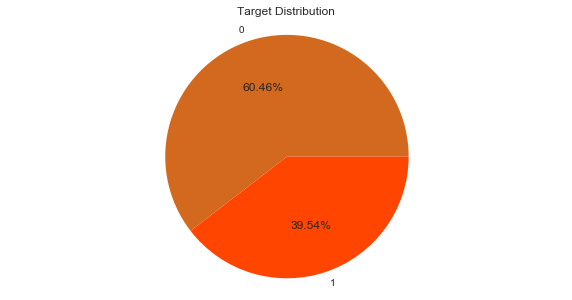

In [314]:
#define color, and label of the chart
plt.figure(figsize=(10,5))
colors = ['chocolate', 'orangered']
labels=['0', '1']
#build the pie chart
plt.title('Target Distribution')
plt.pie(target2,labels=labels,
        colors=colors,
        autopct='%1.2f%%')

plt.axis('equal')

plt.show()

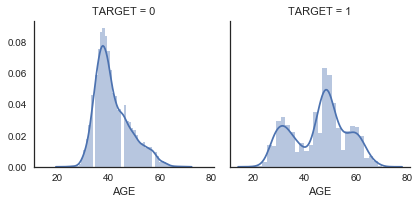

In [317]:
# Explore Target vs Age
g = sns.FacetGrid(test2, col='TARGET')
g = g.map(sns.distplot, "AGE")

### Classification Model 'Random Forest'

In [333]:
target1=test2['TARGET'].value_counts()
target1

0    10264
1     6361
Name: TARGET, dtype: int64

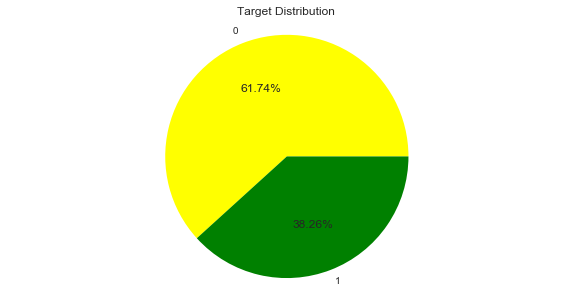

In [334]:
#define color, and label of the chart
plt.figure(figsize=(10,5))
colors = ['yellow', 'green']
labels=['0', '1']
#build the pie chart
plt.title('Target Distribution')
plt.pie(target1,labels=labels,
        colors=colors,
        autopct='%1.2f%%')

plt.axis('equal')

plt.show()

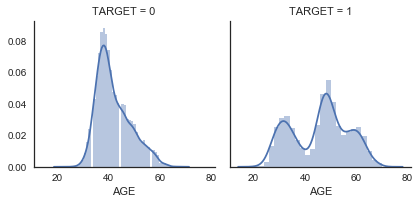

In [335]:
# Explore Target vs Age
g = sns.FacetGrid(test2, col='TARGET')
g = g.map(sns.distplot, "AGE")

## 9. DECISION MAKING

### From the result it can be seen that both of model can be used to predict whether a customer is at risk of being late paying.<br>
    1. Decision Tree's Accuracy is 0.8482357658380112 or equal to 85%
    2. Random Forest's Accuracy is 0.8795108259823576 or equal to 88%
### Decision Tree produces the same predicted value as the actual value with a closeness level of 85%, while Random Forest produces the same predicted value as the actual value with a closeness level of 88%. So, Random Forest has better accuracy than Decision Tree.
### From Pie Chart, it can be concluded that on February-April 2015, the total of customers who are not late paying credit bills will increase.

### After knowing prediction results on which customer might be late, based on the ID, the company can take preventive and anticipatory actions. Preventive by reminding customers of their deadlines patiently, trying to offer other credit that is more affordable, and others. If it's late again, then the anticipatory action is to stop the credit and ask the customer to pay the remaining balance on time according to the contract agreement at the beginning of the loan. If not, company can provide sanctions, take collateral, or report to the authorities.